In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as sklm
import xgboost as xgb
import matplotlib

In [18]:
##train = pd.read_csv('train.csv', parse_dates = ['date'])
test = pd.read_csv('test.csv', parse_dates = ['date'])
#submissions = pd.read_csv('SampleSubmission.csv')
#vd = pd.read_csv('VariableDefinitionsHotspot.csv')

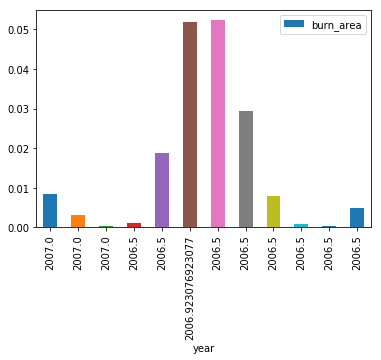

In [8]:
# Date variables
train['month'] = train.date.dt.month
train['year'] = train.date.dt.year

# Plotting mean burn_area for each month - very strong mid-year peak (dry season)
train.groupby('month').mean().reset_index().plot(y='burn_area', x='year', kind='bar')

In [7]:
train.head()

,ID,area,date,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,...,landcover_3,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,population_density,precipitation,month,year
0,0_2000-04-01,0,2000-04-01,25.447,5.296,0.003688,1250.622712,0.0,-178.916305,1250.622712,...,0.0,0.649524,0.0,0.000307,0.0,0.0,2.214262,0.198996,4,2000
1,1_2000-04-01,1,2000-04-01,25.669,5.293,0.000000,1238.019166,0.0,-150.779947,1238.019166,...,0.0,0.570644,0.0,0.000307,0.0,0.0,3.833042,0.188071,4,2000
2,2_2000-04-01,2,2000-04-01,25.443,5.074,0.000000,1240.449964,0.0,-200.503858,1240.449964,...,0.0,0.761700,0.0,0.000000,0.0,0.0,1.927303,0.211730,4,2000
3,3_2000-04-01,3,2000-04-01,25.665,5.070,0.000000,1229.240077,0.0,-177.011032,1229.240077,...,0.0,0.511854,0.0,0.000000,0.0,0.0,1.878281,0.215403,4,2000
4,4_2000-04-01,4,2000-04-01,25.886,5.067,0.000307,1224.093679,0.0,-153.256111,1224.093679,...,0.0,0.677757,0.0,0.000000,0.0,0.0,1.968818,0.199975,4,2000


In [21]:
print(train.columns)

#train = train.drop(['population_density', 'ID', 'date', 'climate_swe', 'landcover_0',
                    #'landcover_1', 'landcover_2', 'landcover_3', 'landcover_5', 'landcover_6',
                    #'landcover_7', 'landcover_8'], axis=1)
test = test.drop(['population_density', 'ID', 'burn_area', 'climate_swe', 'landcover_0','landcover_1', 
                  'landcover_2', 'landcover_3', 'landcover_5', 'landcover_6','landcover_7', 'landcover_8'], axis=1)

Index(['area', 'lat', 'lon', 'burn_area', 'climate_aet', 'climate_def',
       'climate_pdsi', 'climate_pet', 'climate_pr', 'climate_ro',
       'climate_soil', 'climate_srad', 'climate_tmmn', 'climate_tmmx',
       'climate_vap', 'climate_vpd', 'climate_vs', 'elevation', 'landcover_4',
       'precipitation', 'month', 'year'],
      dtype='object')


In [27]:
train.shape

(626644, 21)

In [28]:
test.shape

(137556, 22)

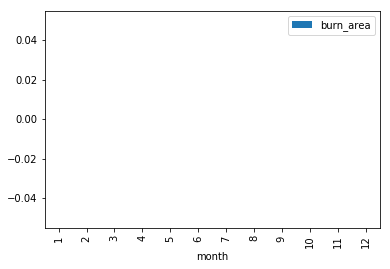

In [20]:
# Date variables
test['month'] = test.date.dt.month
test['year'] = test.date.dt.year

# Plotting mean burn_area for each month - very strong mid-year peak (dry season)
test.groupby('month').mean().reset_index().plot(y='burn_area', x='month', kind='bar')

In [24]:
test.head()

,area,date,lat,lon,climate_aet,climate_def,climate_pdsi,climate_pet,climate_pr,climate_ro,...,climate_tmmn,climate_tmmx,climate_vap,climate_vpd,climate_vs,elevation,landcover_4,precipitation,month,year
0,0,2014-01-01,25.447,5.296,142.756021,1217.926180,-953.401012,1360.571291,1.000000,0.0,...,187.541787,332.578998,2542.124518,111.013969,156.563945,590.564102,0.569045,0.000457,1,2014
1,1,2014-01-01,25.669,5.293,154.836847,1193.866315,-961.703043,1348.688788,1.000000,0.0,...,185.895903,330.826066,2551.085649,106.576545,158.165429,611.544277,0.505068,0.000129,1,2014
2,2,2014-01-01,25.443,5.074,127.790933,1223.640222,-962.435857,1351.521823,1.000000,0.0,...,188.441645,330.077285,2551.183265,107.104292,153.257656,594.188987,0.711657,0.000398,1,2014
3,3,2014-01-01,25.665,5.070,136.924571,1201.258784,-961.326298,1338.120278,1.000000,0.0,...,185.393692,326.942319,2539.815326,101.962346,155.518048,645.362481,0.507897,0.000158,1,2014
4,4,2014-01-01,25.886,5.067,144.278146,1197.831547,-959.248284,1342.118844,0.998555,0.0,...,186.275015,327.839976,2549.462252,102.743046,159.865021,660.372381,0.666145,0.000153,1,2014


In [25]:
Labels = np.array(train['burn_area'])
print(Labels)

[0.00368827 0.         0.         ... 0.         0.         0.        ]


In [32]:
#train = train.drop('burn_area', axis=1)
#test = test.drop('burn_area', axis=1)

In [29]:
train.columns

Index(['area', 'lat', 'lon', 'climate_aet', 'climate_def', 'climate_pdsi',
       'climate_pet', 'climate_pr', 'climate_ro', 'climate_soil',
       'climate_srad', 'climate_tmmn', 'climate_tmmx', 'climate_vap',
       'climate_vpd', 'climate_vs', 'elevation', 'landcover_4',
       'precipitation', 'month', 'year'],
      dtype='object')

In [31]:
test = test.drop('date', axis=1)

In [33]:
Features = np.array(train)
test_enc = np.array(test)

In [34]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(Features[:, :])
Features[:, :] = scaler.transform(Features[:, :])
print(Features[:, :])

[[-1.73159757  0.43753111  1.85451289 ...  0.1322863  -0.75212307
  -1.68075649]
 [-1.73069097  0.49456614  1.85383075 ...  0.04842358 -0.75212307
  -1.68075649]
 [-1.72978438  0.43650345  1.80403446 ...  0.23004017 -0.75212307
  -1.68075649]
 ...
 [ 1.72978438  1.48445787 -2.34861303 ...  1.04469196  1.57520115
   1.60372824]
 [ 1.73069097  1.54174981 -2.34565709 ...  0.77124435  1.57520115
   1.60372824]
 [ 1.73159757  1.5450897  -2.39522601 ...  0.63133742  1.57520115
   1.60372824]]


In [35]:
scaler1 = preprocessing.StandardScaler().fit(test_enc[:, :])
test_enc[:, :] = scaler1.transform(test_enc[:, :])
print(test_enc[:, :])

[[-1.73159757  0.43753111  1.85451289 ... -1.42280041 -1.59325501
  -1.22474487]
 [-1.73069097  0.49456614  1.85383075 ... -1.42552338 -1.59325501
  -1.22474487]
 [-1.72978438  0.43650345  1.80403446 ... -1.42328543 -1.59325501
  -1.22474487]
 ...
 [ 1.72978438  1.48445787 -2.34861303 ...  1.16702286  1.59325501
   1.22474487]
 [ 1.73069097  1.54174981 -2.34565709 ...  1.20350231  1.59325501
   1.22474487]
 [ 1.73159757  1.5450897  -2.39522601 ...  1.31436829  1.59325501
   1.22474487]]


In [36]:
import numpy.random as nr
import sklearn.model_selection as ms
## Randomly sample cases to create independent training and test data
nr.seed(9988)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 0.2)
x_train = Features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
x_test = Features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

In [37]:
indx1 = range(x_train.shape[0])
indx1 = ms.train_test_split(indx1, test_size = 0.2)
x_train1 = x_train[indx1[0],:]
y_train1 = np.ravel(y_train[indx1[0]])
x_train_val = x_train[indx1[1],:]
y_train_val = np.ravel(y_train[indx1[1]])

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

rlf = RandomForestRegressor(n_estimators=500, max_depth=7, max_features=8, random_state=123,
                            min_samples_split=2)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [ ]:
rlf.fit(x_train, y_train)